In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv('C:\\Users\\vipul\\Desktop\\Data Science\\Data Sets\\Data Science In HealthCare\\allstate-purchase-prediction-challenge\\train.csv')

In [3]:
raw_data.shape

(665249, 25)

In [4]:
# set up display area to show dataframe in jupyter qtconsole

pd. set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)


In [5]:
raw_data.head()

,customer_ID,shopping_pt,record_type,day,time,state,location,group_size,homeowner,car_age,car_value,risk_factor,age_oldest,age_youngest,married_couple,C_previous,duration_previous,A,B,C,D,E,F,G,cost
0,10000000,1,0,0,08:35,IN,10001,2,0,2,g,3.0,46,42,1,1.0,2.0,1,0,2,2,1,2,2,633
1,10000000,2,0,0,08:38,IN,10001,2,0,2,g,3.0,46,42,1,1.0,2.0,1,0,2,2,1,2,1,630
2,10000000,3,0,0,08:38,IN,10001,2,0,2,g,3.0,46,42,1,1.0,2.0,1,0,2,2,1,2,1,630
3,10000000,4,0,0,08:39,IN,10001,2,0,2,g,3.0,46,42,1,1.0,2.0,1,0,2,2,1,2,1,630
4,10000000,5,0,0,11:55,IN,10001,2,0,2,g,3.0,46,42,1,1.0,2.0,1,0,2,2,1,2,1,630


## Checkpoint 1:

In [6]:
df = raw_data.drop(['customer_ID'],axis=1)

In [7]:
df['state'].unique()

array(['IN', 'NY', 'PA', 'WV', 'MO', 'OH', 'OK', 'FL', 'OR', 'WA', 'KS',
       'NV', 'ID', 'CO', 'CT', 'AL', 'AR', 'NM', 'MS', 'MD', 'RI', 'UT',
       'ME', 'TN', 'WI', 'MT', 'KY', 'WY', 'NE', 'ND', 'DE', 'GA', 'NH',
       'IA', 'DC', 'SD'], dtype=object)

## Fixing Missing Vales:

In [8]:
df.shape

(665249, 24)

In [9]:
df.isnull().sum()

shopping_pt               0
record_type               0
day                       0
time                      0
state                     0
location                  0
group_size                0
homeowner                 0
car_age                   0
car_value              1531
risk_factor          240418
age_oldest                0
age_youngest              0
married_couple            0
C_previous            18711
duration_previous     18711
A                         0
B                         0
C                         0
D                         0
E                         0
F                         0
G                         0
cost                      0
dtype: int64

In [10]:
df['car_value'] = df['car_value'].fillna(df['car_value'].mode()[0])

In [11]:
df['risk_factor'] = df['risk_factor'].fillna(df['risk_factor'].mode()[0])

In [12]:
df['C_previous'] = df['C_previous'].fillna(df['C_previous'].mode()[0])

In [13]:
df['duration_previous'] = df['duration_previous'].fillna(df['duration_previous'].mode()[0])

## Geting Dummies for categorical Data:

In [14]:
categorical = ['state','car_value']
df_dummies = pd.get_dummies(df[categorical],drop_first=True)
df.drop(['day','time','state','car_value'],axis=1,inplace=True)

## Declaring Inputs and Targets:

In [15]:
x = df.drop(['cost'],axis=1)
y = df['cost']

In [19]:
x.columns

Index(['shopping_pt', 'record_type', 'location', 'group_size', 'homeowner',
       'car_age', 'risk_factor', 'age_oldest', 'age_youngest',
       'married_couple', 'C_previous', 'duration_previous', 'A', 'B', 'C', 'D',
       'E', 'F', 'G'],
      dtype='object')

## Scaling Inputs:

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)
x_scaled_df = pd.DataFrame(x_scaled,columns=['shopping_pt', 'record_type', 'location', 'group_size', 'homeowner',
       'car_age', 'risk_factor', 'age_oldest', 'age_youngest',
       'married_couple', 'C_previous', 'duration_previous', 'A', 'B', 'C', 'D',
       'E', 'F', 'G'])

In [24]:
x_all = pd.concat([x_scaled_df,df_dummies],axis=1)

## Train Test Split:

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_all,y,test_size=0.20,random_state=42)

## Training the model: Random Forest

In [26]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(x_train,y_train)

RandomForestRegressor()

In [27]:
reg.score(x_train,y_train)

0.9856498771980723

## Testing the Model: Using Random Forest

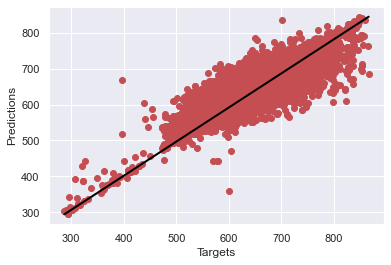

In [28]:
y_pred = reg.predict(x_test)

plt.scatter(y_test,y_pred,color='r')
plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], color = 'black', linewidth = 2)
plt.xlabel('Targets')
plt.ylabel('Predictions')
plt.show()

In [29]:
reg.score(x_test,y_test)

0.8992083004484736